## Classification

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
Y = iris.target

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
import pandas as pd
import numpy as np

data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [4]:
def species(label) :
    if label == 0.0 :
        return 'sentosa'
    elif label == 1.0 :
        return 'versicolor'
    elif label == 2.0 :
        return 'virginica'
    
data['species'] = data['target'].apply(species) 

data['species'].value_counts()

sentosa       50
versicolor    50
virginica     50
Name: species, dtype: int64

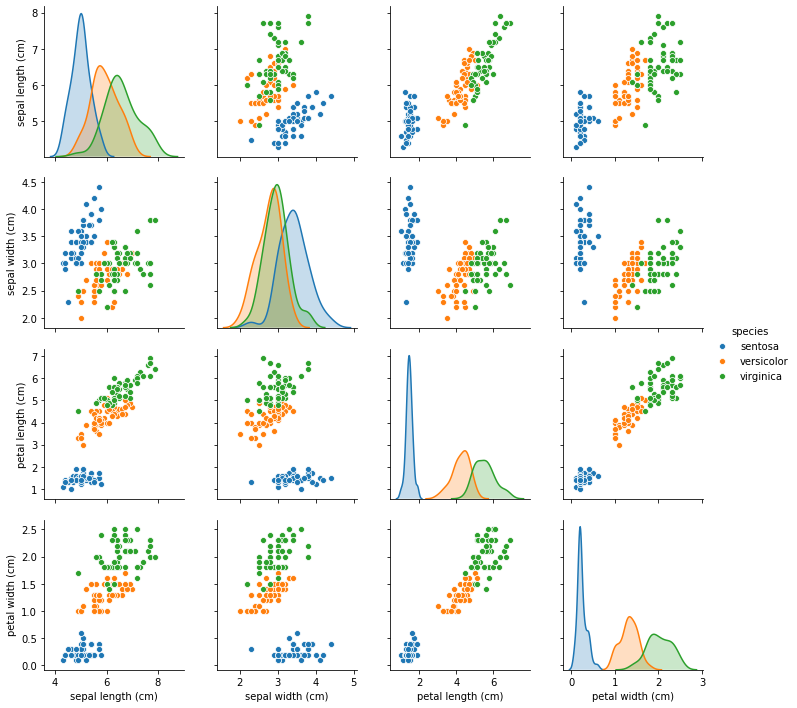

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt       

tmp = data.drop('target', axis=1)
g = sns.pairplot(tmp, hue='species')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [7]:
from sklearn import svm

clf = svm.SVC()
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
predict = clf.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,predict)

0.9777777777777777

In [9]:
print(y_test)
print('\n')
print(predict)

[2 0 0 2 1 2 0 1 0 1 0 0 0 2 0 0 0 0 2 0 0 1 2 0 2 2 2 0 0 0 2 1 2 1 2 1 1
 2 2 0 0 2 1 1 1]


[2 0 0 2 1 1 0 1 0 1 0 0 0 2 0 0 0 0 2 0 0 1 2 0 2 2 2 0 0 0 2 1 2 1 2 1 1
 2 2 0 0 2 1 1 1]


# Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

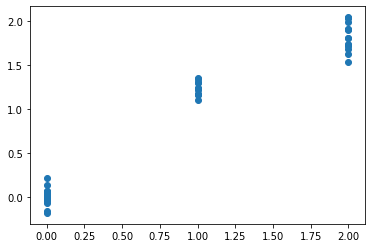

In [24]:
predictions = clf_lr.predict(x_test)
plt.scatter(y_test,predictions)

In [27]:
predict_linear = abs(predictions.round())
print(y_test)
print('\n')
print(predict_linear)

[2 0 0 2 1 2 0 1 0 1 0 0 0 2 0 0 0 0 2 0 0 1 2 0 2 2 2 0 0 0 2 1 2 1 2 1 1
 2 2 0 0 2 1 1 1]


[2. 0. 0. 2. 1. 2. 0. 1. 0. 1. 0. 0. 0. 2. 0. 0. 0. 0. 2. 0. 0. 1. 2. 0.
 2. 2. 2. 0. 0. 0. 2. 1. 2. 1. 2. 1. 1. 2. 2. 0. 0. 2. 1. 1. 1.]


In [26]:
accuracy_score(y_test,predict_linear)

1.0

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
predic_log = clf_log.predict(x_test)
predic_log

array([2, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1,
       2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1,
       1])

In [31]:
accuracy_score(y_test,predic_log)

0.9777777777777777

In [33]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predic_log)

array([[19,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 14]])

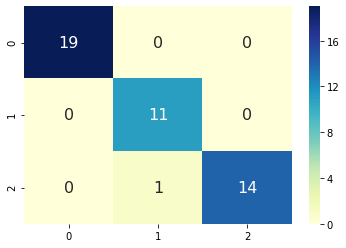

In [36]:
df_cm = pd.DataFrame(confusion_matrix(y_test, predic_log), range(3), range(3))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16},cmap="YlGnBu")

plt.show()

# K Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [38]:
knn_pred = knn.predict(x_test)
knn_pred

array([2, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1,
       2, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1,
       1])

In [39]:
accuracy_score(y_test,knn_pred)

0.9777777777777777

In [40]:
confusion_matrix(y_test, knn_pred)

array([[19,  0,  0],
       [ 0, 11,  0],
       [ 0,  1, 14]])

In [53]:
error_rate = []

for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

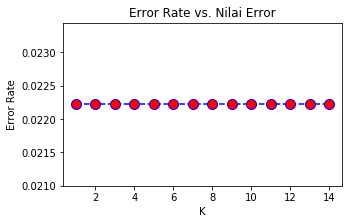

In [44]:
plt.figure(figsize=(5,3))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Nilai Error')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [45]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [47]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [48]:
new_x_train,new_x_test,new_y_train,new_y_test=train_test_split(data.data,data.target,test_size=0.3)

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(new_x_train,new_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [50]:
knn_pred = knn.predict(new_x_test)
knn_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [51]:
accuracy_score(new_y_test,knn_pred)

0.9532163742690059

In [52]:
confusion_matrix(new_y_test, knn_pred)

array([[ 61,   4],
       [  4, 102]])

In [56]:
error_rate_new = []

for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(new_x_train,new_y_train)
    pred_i = knn.predict(new_x_test)
    error_rate_new.append(np.mean(pred_i != new_y_test))

Text(0, 0.5, 'Error Rate')

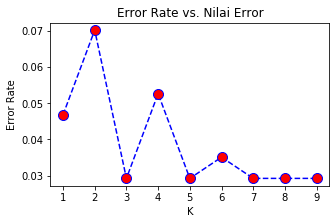

In [60]:
plt.figure(figsize=(5,3))
plt.plot(range(1,10),error_rate_new,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. Nilai Error')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [65]:
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(new_x_train,new_y_train)
pred = knn.predict(new_x_test)

print('dengan K=1')
print('\n')
print(confusion_matrix(new_y_test,pred))
print('\n')
print(classification_report(new_y_test,pred))
print('\n')

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(new_x_train,new_y_train)
pred = knn.predict(new_x_test)

print('dengan K=9')
print('\n')
print(confusion_matrix(new_y_test,pred))
print(classification_report(new_y_test,pred))
print('\n')

dengan K=1


[[ 61   4]
 [  4 102]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        65
           1       0.96      0.96      0.96       106

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



dengan K=9


[[ 62   3]
 [  2 104]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        65
           1       0.97      0.98      0.98       106

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



